<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_python/da10_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터프레임 합치기

*   merge: 두 개 이상의 데이터프레임을 공통된 컬럼(들)을 기준으로 합치는 것. SQL의 join과 비슷.
*   concat: 두 개 이상의 데이터프레임을 축(axis)을 따라서 합치는 것.


# 모듈 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# merge

In [2]:
emp = pd.DataFrame(data={
    'empno': [101, 102, 201, 202],
    'ename': ['Scott', 'King', 'Allen', '오쌤'],
    'deptno': [10, 20, 10, 40]
})
emp

,empno,ename,deptno
0,101,Scott,10
1,102,King,20
2,201,Allen,10
3,202,오쌤,40


In [3]:
dept = pd.DataFrame(data={
    'deptno': [10, 20, 30],
    'dname': ['HR', 'IT', 'Sales']
})
dept

,deptno,dname
0,10,HR
1,20,IT
2,30,Sales



*   `pd.merge(left, right, how, on, ...)` 함수
*   `pd.DataFrame.merge(right, how, on, ...)` 메서드
*   파라미터 `how`: merge 방식(inner, left, right, outer). 기본값은 inner.
*   파라미터 `on`: join 기준이 되는 컬럼(들의 리스트). join 컬럼 이름이 같은 경우에는 생략 가능.


## inner join

In [4]:
pd.merge(left=emp, right=dept)  # 함수(function)

,empno,ename,deptno,dname
0,101,Scott,10,HR
1,102,King,20,IT
2,201,Allen,10,HR


In [5]:
emp.merge(dept)  # 메서드(method)

,empno,ename,deptno,dname
0,101,Scott,10,HR
1,102,King,20,IT
2,201,Allen,10,HR


## left outer join

In [6]:
pd.merge(left=emp, right=dept, how='left')

,empno,ename,deptno,dname
0,101,Scott,10,HR
1,102,King,20,IT
2,201,Allen,10,HR
3,202,오쌤,40,NaN


In [7]:
emp.merge(dept, how='left')

,empno,ename,deptno,dname
0,101,Scott,10,HR
1,102,King,20,IT
2,201,Allen,10,HR
3,202,오쌤,40,NaN


## right outer join

In [8]:
pd.merge(left=emp, right=dept, how='right')

,empno,ename,deptno,dname
0,101.0,Scott,10,HR
1,201.0,Allen,10,HR
2,102.0,King,20,IT
3,NaN,NaN,30,Sales


In [9]:
emp.merge(dept, how='right')

,empno,ename,deptno,dname
0,101.0,Scott,10,HR
1,201.0,Allen,10,HR
2,102.0,King,20,IT
3,NaN,NaN,30,Sales


## full outer join

In [10]:
pd.merge(left=emp, right=dept, how='outer')

,empno,ename,deptno,dname
0,101.0,Scott,10,HR
1,201.0,Allen,10,HR
2,102.0,King,20,IT
3,NaN,NaN,30,Sales
4,202.0,오쌤,40,NaN


## join 조건 컬럼 이름이 다른 경우

In [11]:
dept2 = pd.DataFrame(data={
    'dno': [10, 20, 30],
    'dname': ['인사', '아이티', '영업']
})
dept2

,dno,dname
0,10,인사
1,20,아이티
2,30,영업


In [12]:
# inner join
emp.merge(right=dept2, left_on='deptno', right_on='dno')
#> left_on, right_on: 조인할 컬럼 이름.

,empno,ename,deptno,dno,dname
0,101,Scott,10,10,인사
1,102,King,20,20,아이티
2,201,Allen,10,10,인사


In [13]:
# left outer join
emp.merge(right=dept2, how='left', left_on='deptno', right_on='dno')

,empno,ename,deptno,dno,dname
0,101,Scott,10,10.0,인사
1,102,King,20,20.0,아이티
2,201,Allen,10,10.0,인사
3,202,오쌤,40,NaN,NaN


In [14]:
# right outer join
emp.merge(right=dept2, how='right', left_on='deptno', right_on='dno')

,empno,ename,deptno,dno,dname
0,101.0,Scott,10.0,10,인사
1,201.0,Allen,10.0,10,인사
2,102.0,King,20.0,20,아이티
3,NaN,NaN,NaN,30,영업


In [15]:
# full outer join
emp.merge(right=dept2, how='outer', left_on='deptno', right_on='dno')

,empno,ename,deptno,dno,dname
0,101.0,Scott,10.0,10.0,인사
1,201.0,Allen,10.0,10.0,인사
2,102.0,King,20.0,20.0,아이티
3,NaN,NaN,NaN,30.0,영업
4,202.0,오쌤,40.0,NaN,NaN


## 인덱스(row label)로 merge

In [16]:
np.random.seed(1)

In [17]:
df1 = pd.DataFrame(data={'value1': np.random.randint(10, size=6),
                         'value2': np.random.randint(100, size=6)},
                   index=['a', 'b', 'c'] * 2)
df1

,value1,value2
a,5,1
b,8,76
c,9,71
a,5,6
b,0,25
c,0,50


In [18]:
df2 = pd.DataFrame(data={'data1': np.random.rand(3),
                         'data2': np.random.rand(3)},
                   index=['a', 'b', 'c'])
df2

,data1,data2
a,0.846311,0.443453
b,0.313274,0.229577
c,0.524548,0.534414


In [19]:
pd.merge(left=df1, right=df2, left_index=True, right_index=True)
#> left_index와 right_index의 기본값은 False.
#> left_index 또는 right_index를 True로 설정하면, 조인할 때 인덱스를 사용함.

,value1,value2,data1,data2
a,5,1,0.846311,0.443453
b,8,76,0.313274,0.229577
c,9,71,0.524548,0.534414
a,5,6,0.846311,0.443453
b,0,25,0.313274,0.229577
c,0,50,0.524548,0.534414


In [20]:
df3 = pd.DataFrame(data={
    'value1': np.random.randint(10, size=6),
    'value2': np.random.randint(100, size=6),
    'value3': ['a', 'b', 'c'] * 2
})
df3

,value1,value2,value3
0,4,94,a
1,7,96,b
2,7,86,c
3,9,13,a
4,1,9,b
5,7,7,c


In [21]:
df4 = pd.DataFrame(data={'data1': [10, 20, 30]},
                   index=['a', 'b', 'c'])
df4

,data1
a,10
b,20
c,30


In [22]:
# df3 데이터프레임의 컬럼과 df4 데이터프레임의 인덱스를 사용해서 조인
pd.merge(left=df3, right=df4, left_on='value3', right_index=True)

,value1,value2,value3,data1
0,4,94,a,10
1,7,96,b,20
2,7,86,c,30
3,9,13,a,10
4,1,9,b,20
5,7,7,c,30


# concat

## Series에서의 concat

In [23]:
s1 = pd.Series(data=['scott', 'allen', 'king'])
s1

,0
0,scott
1,allen
2,king


In [24]:
s2 = pd.Series(data=['홍길동', '오쌤'])
s2

,0
0,홍길동
1,오쌤


In [25]:
pd.concat([s1, s2])  # objs 파라미터: Series 또는 DataFrame을 원소로 갖는 Iterable(list, tuple, ndarray)

,0
0,scott
1,allen
2,king
0,홍길동
1,오쌤


In [26]:
pd.concat([s1, s2], ignore_index=True)

,0
0,scott
1,allen
2,king
3,홍길동
4,오쌤


In [27]:
s3 = pd.Series(data=['HR', 'IT'])
s3

,0
0,HR
1,IT


In [28]:
pd.concat([s2, s3], axis=1)

,0,1
0,홍길동,HR
1,오쌤,IT


## DataFrame에서의 concat

In [29]:
np.random.seed(42)

In [30]:
score1 = pd.DataFrame(data={
    'id': np.arange(1, 6),
    'korean': np.random.randint(101, size=5),
    'english': np.random.randint(101, size=5),
    'math': np.random.randint(101, size=5)
})
score1

,id,korean,english,math
0,1,51,20,87
1,2,92,82,99
2,3,14,86,23
3,4,71,74,2
4,5,60,74,21


In [31]:
score2 = pd.DataFrame(data={
    'id': np.arange(6, 11),
    'korean': np.random.randint(101, size=5),
    'english': np.random.randint(101, size=5),
    'math': np.random.randint(101, size=5)
})
score2

,id,korean,english,math
0,6,52,1,75
1,7,1,63,57
2,8,87,59,21
3,9,29,20,88
4,10,37,32,48


In [32]:
pd.concat([score1, score2], ignore_index=True)  # axis=0 기본값

,id,korean,english,math
0,1,51,20,87
1,2,92,82,99
2,3,14,86,23
3,4,71,74,2
4,5,60,74,21
5,6,52,1,75
6,7,1,63,57
7,8,87,59,21
8,9,29,20,88
9,10,37,32,48


In [33]:
score3 = pd.DataFrame(data={
    'id': np.arange(1, 6),
    'science': np.random.randint(101, size=5),
    'history': np.random.randint(101, size=5),
    'art': np.random.randint(101, size=5)
})
score3

,id,science,history,art
0,1,90,79,61
1,2,58,14,50
2,3,41,61,54
3,4,91,61,63
4,5,59,46,2


In [34]:
pd.concat([score1, score3], axis=1)

,id,korean,english,math,id,science,history,art
0,1,51,20,87,1,90,79,61
1,2,92,82,99,2,58,14,50
2,3,14,86,23,3,41,61,54
3,4,71,74,2,4,91,61,63
4,5,60,74,21,5,59,46,2


In [35]:
pd.merge(left=score1, right=score3)

,id,korean,english,math,science,history,art
0,1,51,20,87,90,79,61
1,2,92,82,99,58,14,50
2,3,14,86,23,41,61,54
3,4,71,74,2,91,61,63
4,5,60,74,21,59,46,2


# merge, concat 연습 1.

미세먼지 농도 데이터셋

*   https://github.com/pandas-dev/pandas/tree/main/doc/data 데이터 사용
*   air_quality_no2_long.csv, air_quality_pm25_long.csv, air_quality_stations.csv 파일을 읽고, 각각 데이터프레임을 생성.
*   air_quality_no2 데이터프레임과 air_quality_pm25 데이터프레임을 합치세요.(merge? concat?)
*   위에서 만들어진 데이터프레임과 air_quality_stations 데이터프레임을 합치세요.(merge? concat?)
*   데이터프레임 탐색


In [36]:
# 파일 경로
no2_file = 'https://github.com/pandas-dev/pandas/raw/refs/heads/main/doc/data/air_quality_no2_long.csv'
pm25_file = 'https://github.com/pandas-dev/pandas/raw/refs/heads/main/doc/data/air_quality_pm25_long.csv'
stations_file = 'https://github.com/pandas-dev/pandas/raw/refs/heads/main/doc/data/air_quality_stations.csv'

## no2 데이터프레임

In [37]:
no2_df = pd.read_csv(no2_file)

In [38]:
no2_df.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [39]:
no2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [40]:
no2_df.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [41]:
no2_df.country.unique()

array(['FR', 'BE', 'GB'], dtype=object)

In [42]:
no2_df.location.unique()

array(['FR04014', 'BETR801', 'London Westminster'], dtype=object)

In [43]:
no2_df.parameter.unique()

array(['no2'], dtype=object)

In [44]:
no2_df.unit.unique()

array(['µg/m³'], dtype=object)

## pm25 데이터프레임

In [45]:
pm25_df = pd.read_csv(pm25_file)

In [46]:
pm25_df.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


In [47]:
pm25_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       1110 non-null   object 
 1   country    1110 non-null   object 
 2   date.utc   1110 non-null   object 
 3   location   1110 non-null   object 
 4   parameter  1110 non-null   object 
 5   value      1110 non-null   float64
 6   unit       1110 non-null   object 
dtypes: float64(1), object(6)
memory usage: 60.8+ KB


In [48]:
pm25_df.city.unique()

array(['Antwerpen', 'London'], dtype=object)

In [49]:
pm25_df.country.unique()

array(['BE', 'GB'], dtype=object)

In [50]:
pm25_df.location.unique()

array(['BETR801', 'London Westminster'], dtype=object)

In [51]:
pm25_df.parameter.unique()

array(['pm25'], dtype=object)

In [52]:
pm25_df.unit.unique()

array(['µg/m³'], dtype=object)

## no2 데이터프레임과 pm25 데이터프레임 concat

In [53]:
air_quality = pd.concat([no2_df, pm25_df], ignore_index=True)

In [54]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [55]:
air_quality.tail()

,city,country,date.utc,location,parameter,value,unit
3173,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³
3174,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³
3175,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³
3176,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³
3177,London,GB,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0,µg/m³


In [56]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       3178 non-null   object 
 1   country    3178 non-null   object 
 2   date.utc   3178 non-null   object 
 3   location   3178 non-null   object 
 4   parameter  3178 non-null   object 
 5   value      3178 non-null   float64
 6   unit       3178 non-null   object 
dtypes: float64(1), object(6)
memory usage: 173.9+ KB


In [57]:
air_quality.location.unique()

array(['FR04014', 'BETR801', 'London Westminster'], dtype=object)

## stations 데이터프레임

In [58]:
stations_df = pd.read_csv(stations_file)

In [59]:
stations_df.head()

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226


In [60]:
stations_df.tail()

,location,coordinates.latitude,coordinates.longitude
61,Southend-on-Sea,51.54420,0.67841
62,Southwark A2 Old Kent Road,51.48050,-0.05955
63,Thurrock,51.47707,0.31797
64,Tower Hamlets Roadside,51.52253,-0.04216
65,Groton Fort Griswold,41.35360,-72.07890


In [61]:
stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   location               66 non-null     object 
 1   coordinates.latitude   66 non-null     float64
 2   coordinates.longitude  66 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


## air_quality 데이터프레임과 stations 데이터프레임 merge(inner join)

In [62]:
df = pd.merge(left=air_quality, right=stations_df)

In [63]:
df.head(n=10)

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,48.83724,2.3939
1,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,48.83722,2.3939
2,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,48.83724,2.3939
3,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,48.83722,2.3939
4,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,48.83724,2.3939
5,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,48.83722,2.3939
6,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,48.83724,2.3939
7,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,48.83722,2.3939
8,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,48.83724,2.3939
9,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,48.83722,2.3939


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4182 entries, 0 to 4181
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   4182 non-null   object 
 1   country                4182 non-null   object 
 2   date.utc               4182 non-null   object 
 3   location               4182 non-null   object 
 4   parameter              4182 non-null   object 
 5   value                  4182 non-null   float64
 6   unit                   4182 non-null   object 
 7   coordinates.latitude   4182 non-null   float64
 8   coordinates.longitude  4182 non-null   float64
dtypes: float64(3), object(6)
memory usage: 294.2+ KB


In [65]:
stations_df[stations_df.location == 'FR04014']

,location,coordinates.latitude,coordinates.longitude
26,FR04014,48.83724,2.3939
27,FR04014,48.83722,2.3939


## stations 데이터프레임에서 중복 데이터 제거

In [66]:
stations_df.location.value_counts()

,count
location,
FR04031,2
FR04014,2
FR04141,2
FR04143,2
FR04329,2
FR04135,2
FR04071,2
FR04118,2
BELAL01,1


In [67]:
# stations_df 데이터프레임의 location 컬럼 값이 중복되는 행들을 제거
stations_df.drop_duplicates(subset='location', inplace=True)
#> subset: 중복값들을 찾을 컬럼 이름(들의 리스트)
#> inplace=True: 원본 데이터프레임을 변경.
#> inplace=False(기본값): 원본 데이터프레임은 수정하지 않고, 중복된 값들이 제거된 새로운 데이터프레임을 리턴.

In [68]:
stations_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 0 to 65
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   location               58 non-null     object 
 1   coordinates.latitude   58 non-null     float64
 2   coordinates.longitude  58 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.8+ KB


## air_quality와 중복값이 제거된 stations를 merge(inner join)

In [69]:
df = pd.merge(left=air_quality, right=stations_df)

In [70]:
df.head(n=10)

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,48.83724,2.3939
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,48.83724,2.3939
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,48.83724,2.3939
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,48.83724,2.3939
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,48.83724,2.3939
5,Paris,FR,2019-06-20 19:00:00+00:00,FR04014,no2,25.3,µg/m³,48.83724,2.3939
6,Paris,FR,2019-06-20 18:00:00+00:00,FR04014,no2,23.9,µg/m³,48.83724,2.3939
7,Paris,FR,2019-06-20 17:00:00+00:00,FR04014,no2,23.2,µg/m³,48.83724,2.3939
8,Paris,FR,2019-06-20 16:00:00+00:00,FR04014,no2,19.0,µg/m³,48.83724,2.3939
9,Paris,FR,2019-06-20 15:00:00+00:00,FR04014,no2,19.3,µg/m³,48.83724,2.3939


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   city                   3178 non-null   object 
 1   country                3178 non-null   object 
 2   date.utc               3178 non-null   object 
 3   location               3178 non-null   object 
 4   parameter              3178 non-null   object 
 5   value                  3178 non-null   float64
 6   unit                   3178 non-null   object 
 7   coordinates.latitude   3178 non-null   float64
 8   coordinates.longitude  3178 non-null   float64
dtypes: float64(3), object(6)
memory usage: 223.6+ KB


## 문자열 타입을 시간 타입을 변환

In [72]:
df['date.utc'] = pd.to_datetime(df['date.utc'], utc=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178 entries, 0 to 3177
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   city                   3178 non-null   object             
 1   country                3178 non-null   object             
 2   date.utc               3178 non-null   datetime64[ns, UTC]
 3   location               3178 non-null   object             
 4   parameter              3178 non-null   object             
 5   value                  3178 non-null   float64            
 6   unit                   3178 non-null   object             
 7   coordinates.latitude   3178 non-null   float64            
 8   coordinates.longitude  3178 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), object(5)
memory usage: 223.6+ KB


In [74]:
df.head()

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,48.83724,2.3939
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,48.83724,2.3939
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,48.83724,2.3939
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,48.83724,2.3939
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,48.83724,2.3939


## London의 NO2, PM25 시계열 그래프

In [75]:
london_df = df[df.city == 'London']

In [76]:
london_df.head()

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
1099,London,GB,2019-06-17 11:00:00+00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
1100,London,GB,2019-06-17 10:00:00+00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
1101,London,GB,2019-06-17 09:00:00+00:00,London Westminster,no2,11.0,µg/m³,51.49467,-0.13193
1102,London,GB,2019-06-17 08:00:00+00:00,London Westminster,no2,13.0,µg/m³,51.49467,-0.13193
1103,London,GB,2019-06-17 07:00:00+00:00,London Westminster,no2,13.0,µg/m³,51.49467,-0.13193


In [77]:
london_df.tail()

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
3173,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³,51.49467,-0.13193
3174,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
3175,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
3176,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
3177,London,GB,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193


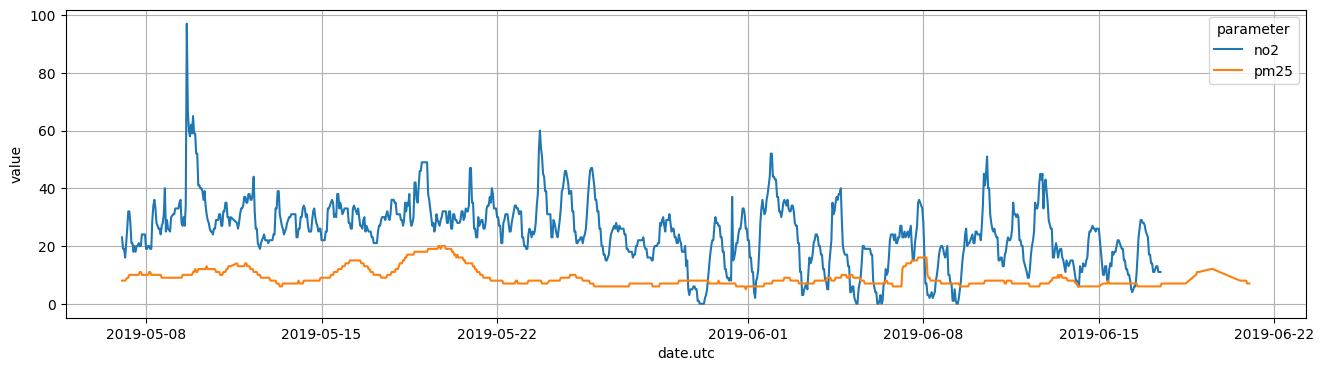

In [78]:
plt.figure(figsize=(16, 4))
sns.lineplot(data=london_df, x='date.utc', y='value', hue='parameter')
plt.grid()
plt.show()

# merge, concat 연습 2

미국 신생아 이름 데이터셋

*   https://github.com/wesm/pydata-book/tree/3rd-edition/datasets/babynames 데이터 파일들을 사용
*   1880년부터 2010년까지 미국 신생아들의 이름, 성별, 출생자수가 정리된 파일들
*   파일을 하나씩 읽어서 데이터프레임을 생성.
*   각각의 데이터프레임에 year 컬럼을 추가.
*   생성된 131개의 데이터프레임들을 하나로 합치세요.(merge? concat?)
*   연도별 신생아 수를 찾고 그래프를 그리세요.
*   연도별 성별 신생아 수를 찾고 그래프를 그리세요.


In [81]:
file_path = 'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/datasets/babynames/yob2010.txt'
yob = pd.read_csv(file_path, names=['name', 'gender', 'births'])
yob['year'] = 2010
yob

,name,gender,births,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010
...,...,...,...,...
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010


In [83]:
col_names = ['name', 'gender', 'births']  # 데이터프레임 컬럼 이름
yobs = []  # 각 연도의 데이터프레임을 저장할 빈 리스트
for year in range(1880, 2011):
    # txt 파일의 github 경로
    file_path = f'https://github.com/wesm/pydata-book/raw/refs/heads/3rd-edition/datasets/babynames/yob{year}.txt'

    # 파일을 읽고 데이터 프레임을 생성
    yob_year = pd.read_csv(file_path, names=col_names)

    # 데이터프레임에 year 파생변수 추가
    yob_year['year'] = year

    # 데이터프레임을 리스트에 추가
    yobs.append(yob_year)

In [84]:
len(yobs)  #> 131개 DataFrame을 저장.

131

In [86]:
yobs[0]  #> 리스트의 첫번째 아이템 - 1880년 데이터프레임

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880


In [87]:
yobs[-1]  #> 리스트의 마지막 아이템 - 2010년 데이터프레임

,name,gender,births,year
0,Isabella,F,22731,2010
1,Sophia,F,20477,2010
2,Emma,F,17179,2010
3,Olivia,F,16860,2010
4,Ava,F,15300,2010
...,...,...,...,...
33833,Zymaire,M,5,2010
33834,Zyonne,M,5,2010
33835,Zyquarius,M,5,2010
33836,Zyran,M,5,2010


In [88]:
# 131개의 데이터프레임을 axis=0 방향으로 concat(이어붙이기)
yob_df = pd.concat(yobs, ignore_index=True)

In [89]:
yob_df

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [90]:
yob_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690784 entries, 0 to 1690783
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   name    1690784 non-null  object
 1   gender  1690784 non-null  object
 2   births  1690784 non-null  int64 
 3   year    1690784 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 51.6+ MB


## 연도별 신생아 수

In [91]:
yob_by_year = yob_df.groupby(by=['year']).births.sum()
yob_by_year

,births
year,
1880,201486
1881,192703
1882,221538
1883,216954
1884,243466
...,...
2006,3946702
2007,3986130
2008,3915955


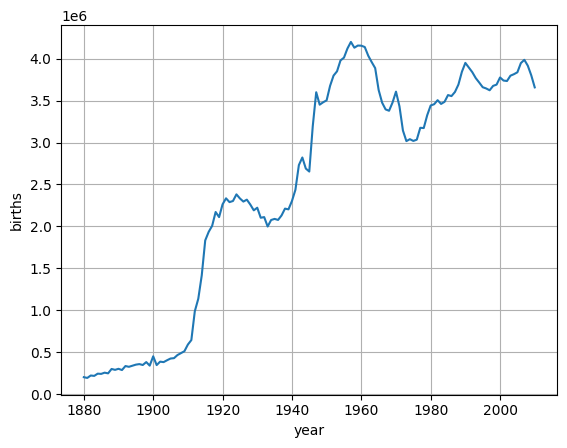

In [93]:
sns.lineplot(data=yob_by_year)
plt.grid()
plt.show()

## 연도별 성별 신생아 수

In [94]:
yob_by_year_gender = yob_df.groupby(by=['year', 'gender']).births.sum()
yob_by_year_gender

year  gender
1880  F           90993
      M          110493
1881  F           91955
      M          100748
1882  F          107851
                 ...   
2008  M         2032310
2009  F         1827643
      M         1973359
2010  F         1759010
      M         1898382
Name: births, Length: 262, dtype: int64

In [98]:
yob_by_year_gender = yob_by_year_gender.reset_index()

In [99]:
yob_by_year_gender

,year,gender,births
0,1880,F,90993
1,1880,M,110493
2,1881,F,91955
3,1881,M,100748
4,1882,F,107851
...,...,...,...
257,2008,M,2032310
258,2009,F,1827643
259,2009,M,1973359
260,2010,F,1759010


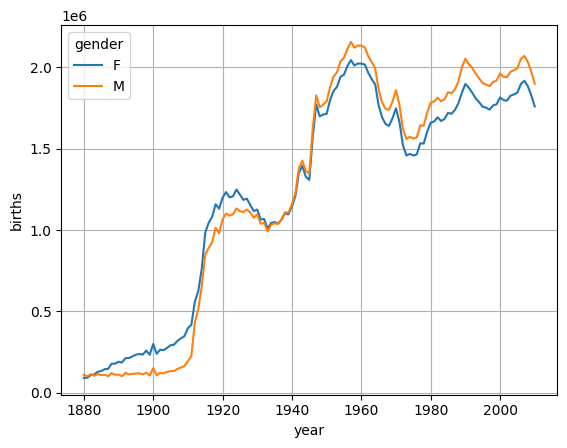

In [100]:
sns.lineplot(data=yob_by_year_gender, x='year', y='births', hue='gender')
plt.grid()
plt.show()